In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Regression
==========
In regression we try to predict a continuous output variable. This can be most easily visualized in one dimension.
We will start with a very simple toy example. We will create a dataset out of a sinus curve with some noise:

In [3]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [6]:
rng = np.random.RandomState(42)

y = np.sin(4 * x) + x + rng.uniform(size=len(x))
print (y)

[-2.08888696 -1.26522393 -1.27876477 -1.257685   -1.6021601  -1.56246646
 -1.67788501 -0.93995725 -1.32019251 -1.36313841 -2.22294822 -1.45474072
 -1.76798534 -2.54470161 -2.69996037 -2.78041759 -2.6905667  -2.44463288
 -2.45356039 -2.45328945 -1.9392768  -2.17361031 -1.74867325 -1.38028857
 -0.98819094 -0.36261351 -0.6713562  -0.11238917  0.16709517 -0.22889529
  0.42561591  0.02353616 -0.10397021  0.70568803  0.60399931  0.29454063
 -0.38280894 -0.77096368 -0.35912081 -0.75766206 -1.19740211 -0.90239699
 -1.38971288 -0.48460668 -1.04649125 -0.49725198 -0.6506897  -0.20108124
  0.10012603  0.0336359   1.12080318  1.22171707  1.6606482   1.85722813
  1.75767424  2.22714547  1.48241959  1.62008427  1.44280119  1.64477068
  1.58649184  1.31470287  1.6973733   1.04417604  0.79479123  0.90432881
  0.38412173  0.97121878  0.2215386   1.16881588  1.04759047  0.62403508
  0.63214572  1.68649141  1.85464681  2.1732681   2.51792076  2.11486255
  2.6715699   2.66699876  3.60762202  3.50880354  3

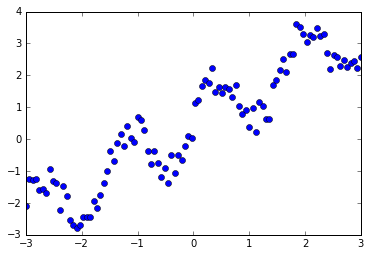

In [7]:
import matplotlib.pyplot as plt
plt.plot(x, y,'o')

Linear Regression
=================
One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is LinearRegression (also known as ordinary least squares).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

To apply a scikit-learn model, we need to make X be a 2d-array:

In [10]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)
print(x)
print(X)

(100,)
(100, 1)
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485 

We split our data in a training and a test set again:

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Then we can built our regression model:

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And predict. First let us try the training set:

In [21]:
y_pred_train = regressor.predict(X_train)

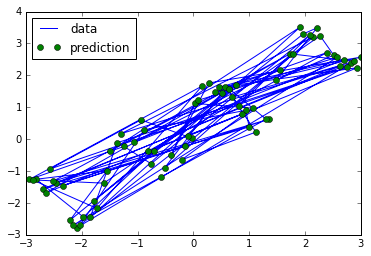

In [43]:
plt.plot(X_train, y_train, label="data")
plt.plot(X_train, y_pred_train,'o' ,label="prediction")
plt.legend(loc='best')

The line is able to capture the general slope of the data, but not many details.

Let's try the test set:

In [23]:
y_pred_test = regressor.predict(X_test)

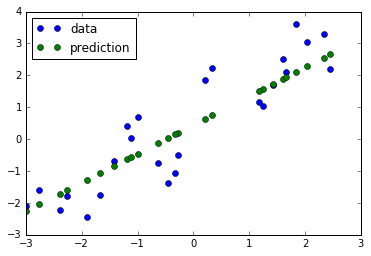

In [24]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R2 score. Another popular way would be the mean squared error.

In [25]:
regressor.score(X_test, y_test)

0.79943214050796851

KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

Again, let us look at the behavior on training and test set:

In [35]:
KNeighborsRegression=KNeighborsRegressor(n_neighbors=10)
knr=KNeighborsRegression.fit(X_train,y_train)

On the training set, we do a perfect job: each point is its own nearest neighbor!

In [36]:
knr.score(X_test,y_test)

0.92750596431321908

On the test set, we also do a better job of capturing the variation, but our estimates look much more messy then before.
Let us look at the R2 score:

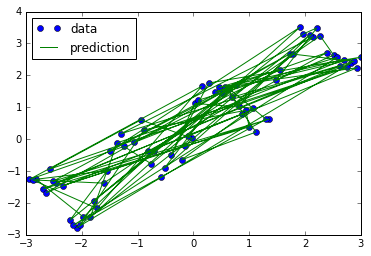

In [38]:
# %load scripts/knn_regression.py
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, label="prediction")
plt.legend(loc='best')

#y_pred_test = kneighbor_regression.predict(X_test)

#plt.plot(X_test, y_test, 'o', label="data")
#plt.plot(X_test, y_pred_test, 'o', label="prediction")
#plt.legend(loc='best')


### Random Forests

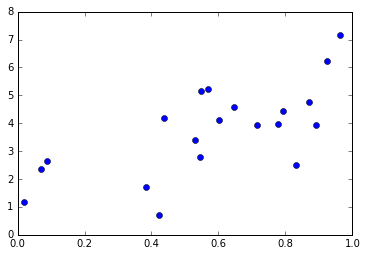

In [39]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

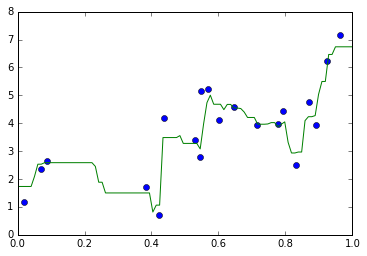

In [40]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Much better then before! Here, the linear model was not a good fit for our problem.

Exercise
=========
Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``.